In [1]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora

from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')



# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import xlrd
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import nltk

In [3]:
#!pip install xlrd

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
stop= stopwords.words('english')
stop.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [6]:
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    if doc is not None:
      stop_free = " ".join([i for i in str(doc).lower().split() if i not in stop])
      punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
      normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
      return normalized
    else:
      return doc

In [8]:
file_path = ("capstone dataset.xlsx")
data = pd.read_excel(file_path, sheet_name='Workers from all websites')

In [9]:
data['DESCRIPTION'].isnull().value_counts()

False    1817
True        9
Name: DESCRIPTION, dtype: int64

In [10]:
data.DESCRIPTION.dropna()

0       About UsProfessional, Reliable & TrustworthyWe...
1       About UsWe have been offering complete residen...
2       We are a local owned business , and serve the ...
3       Welcome to Gold's Electrical ServicesFor servi...
4                                   Electricians/handyman
                              ...                        
1821    Installation and maintenance of electric vehic...
1822    We have been in this feild for over 8 years an...
1823    DOMESTIC, COMMERCIAL AND INDUSTRIAL\nSwitch bo...
1824    Energy-Tech Electrical Solutions currently ser...
1825    Please don't hesitate to contact Tested Electr...
Name: DESCRIPTION, Length: 1817, dtype: object

In [12]:
data[(data.DESCRIPTION == ' ')].index.tolist()

[]

In [13]:
data

,Name,ADDRESS,SUBURB,POSTCODE,LICENCE INFO PROVIDED,LICENCE INFO,LICENCE NUMBER,DESCRIPTION,RATING,Reviews,DATE,WEBSITE,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Rod Cetinich,"2830 ELEVENTH ST, NICKELS POINT VIC 3501",NICHOLS POINT,3501.0,VIC Energysafe10109,Licenced Electrician,10109.0,"About UsProfessional, Reliable & TrustworthyWe...",4,5,2021-09-28 00:00:00,HiPages,NaN,NaN,NaN
1,Peter Ryan,"KILMORE, VICTORIA",KILMORE,3764.0,VIC Energysafe10277,Licenced Electrician,10277.0,About UsWe have been offering complete residen...,5,5,2021-09-28 00:00:00,HiPages,NaN,NaN,NaN
2,Stephen,"ARMADALE, VIC",ARMADALE,3143.0,10377,Licenced Electrician,10377.0,"We are a local owned business , and serve the ...",5,37,2021-08-15 00:00:00,Service Seek,NaN,NaN,NaN
3,David Gold,"CHELTENHAM, VICTORIA",CHELTENHAM,3192.0,VIC Energysafe10700,Licenced Electrician,10700.0,Welcome to Gold's Electrical ServicesFor servi...,4.9,153,2021-09-28 00:00:00,HiPages,NaN,NaN,NaN
4,Brendan Mcgillivray,MILDURA VIC 3500,MILDURA,3500.0,VIC EnergysafeREC-11235,Licenced Electrician,11235.0,Electricians/handyman,3,2,2021-09-28 00:00:00,HiPages,NaN,NaN,Scrapped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Wyll,"CAULFIELD, VIC",CAULFIELD,3162.0,Electrician - Licence Number not provided,Electrician - Licence Number not provided,NaN,Installation and maintenance of electric vehic...,5,4,2021-08-15 00:00:00,Service Seek,NaN,NaN,NaN
1822,Youssef Joe El Tabaa,"TAYLORS HILL, VIC",TAYLORS HILL,3037.0,Electrician - Licence Number not provided,Electrician - Licence Number not provided,NaN,We have been in this feild for over 8 years an...,5,9,2021-08-17 00:00:00,Service Seek,NaN,NaN,NaN
1823,Zac,"LYNBROOK, VIC",LYNBROOK,3975.0,Electrician - Licence Number not provided,Electrician - Licence Number not provided,NaN,"DOMESTIC, COMMERCIAL AND INDUSTRIAL\nSwitch bo...",5,1,2021-08-17 00:00:00,Service Seek,NaN,NaN,NaN
1824,Zach Cowan,"HURSTBRIDGE, VIC",HURSTBRIDGE,3099.0,Electrician - Licence Number not provided,Electrician - Licence Number not provided,NaN,Energy-Tech Electrical Solutions currently ser...,5,1,2021-08-17 00:00:00,Service Seek,NaN,NaN,NaN


# Tokenize Sentences and Clean

In [14]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 

In [15]:
data_list = data.DESCRIPTION.values.tolist()
data_list

['About UsProfessional, Reliable & TrustworthyWe cover all aspects of electrical from New homes and developments through to smaller jobs and general maintenance.Our professional and courteous service ensures you that all our work is completed to the highest standard at affordable rates.Our ServicesThe aim of Rod Cetinich Electrical is to provide an excellent electrical service to our clients by:All aspects of Electrical Domestic Commercial Industrial and Rural Installations & MaintenanceExtensions & RenovationsBathroom laundry & Kitchen RenovationsTV Phone & DataTesting & TaggingLighting & DesignSafety switchesSmoke alarmsPower pointsSwitchboard & main upgradesRewiresFault findingHot Water System installationsCeiling FansAppliance installations (ovens cooktops etc)Solar Power InstallationsIrrigationPumpCool RoomsDigital TV AntennasCall us now for a Free quotation, no job is too small!',
 'About UsWe have been offering complete residential and commercial electrical services in Kilmore a

In [16]:
electric_data = data['DESCRIPTION']
doc_clean = [clean(doc).split() for doc in electric_data] 
dictionary = corpora.Dictionary(doc_clean) 
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

In [17]:
base_model_lda = gensim.models.ldamodel.LdaModel
ldamodel = gensim.models.ldamodel.LdaModel(corpus = corpus, 
                          id2word = dictionary,
                          num_topics = 4,
                          passes = 50)

In [18]:
ldamodel[corpus]

create four topics for lda model

In [19]:
pprint(ldamodel.print_topics())

[(0,
  '0.010*"work" + 0.010*"job" + 0.009*"cleaning" + 0.008*"experience" + '
  '0.008*"year" + 0.006*"im" + 0.006*"service" + 0.006*"task" + '
  '0.006*"business" + 0.004*"professional"'),
 (1,
  '0.036*"electrical" + 0.021*"service" + 0.015*"electrician" + 0.014*"work" + '
  '0.014*"installation" + 0.009*"year" + 0.009*"home" + 0.008*"commercial" + '
  '0.008*"job" + 0.008*"lighting"'),
 (2,
  '0.026*"electricianshandyman" + 0.011*"u" + 0.008*"contact" + 0.008*"today" '
  '+ 0.005*"information" + 0.005*"electricianhandyman" + 0.004*"solar" + '
  '0.003*"furniture" + 0.003*"task" + 0.003*"item"'),
 (3,
  '0.009*"electrical" + 0.007*"system" + 0.007*"service" + 0.005*"home" + '
  '0.005*"u" + 0.005*"installation" + 0.005*"power" + 0.004*"lighting" + '
  '0.003*"repair" + 0.003*"new"')]


In [20]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7645,"electrical, system, service, home, u, installa...","[usprofessional, reliable, trustworthywe, cove..."
1,1,1.0,0.6554,"electrical, service, electrician, work, instal...","[uswe, offering, complete, residential, commer..."
2,2,1.0,0.9897,"electrical, service, electrician, work, instal...","[local, owned, business, serve, community, pri..."
3,3,1.0,0.9964,"electrical, service, electrician, work, instal...","[welcome, gold, electrical, servicesfor, servi..."
4,4,2.0,0.6250,"electricianshandyman, u, contact, today, infor...",[electricianshandyman]
5,5,1.0,0.6245,"electrical, service, electrician, work, instal...",[electrician]
6,6,1.0,0.5455,"electrical, service, electrician, work, instal...","[aboutwe, industry, 30, year, experienced, eve..."
7,7,3.0,0.9874,"electrical, system, service, home, u, installa...","[aboutelectrical, service, prompt, reliable, f..."
8,8,1.0,0.9969,"electrical, service, electrician, work, instal...","[uswhere, safety, prime, importance, dorset, e..."
9,9,1.0,0.9933,"electrical, service, electrician, work, instal...","[reverse, dash, cam, subwoofer, led, light, ba..."


 In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

# Frequency Distribution of Word Counts in Documents

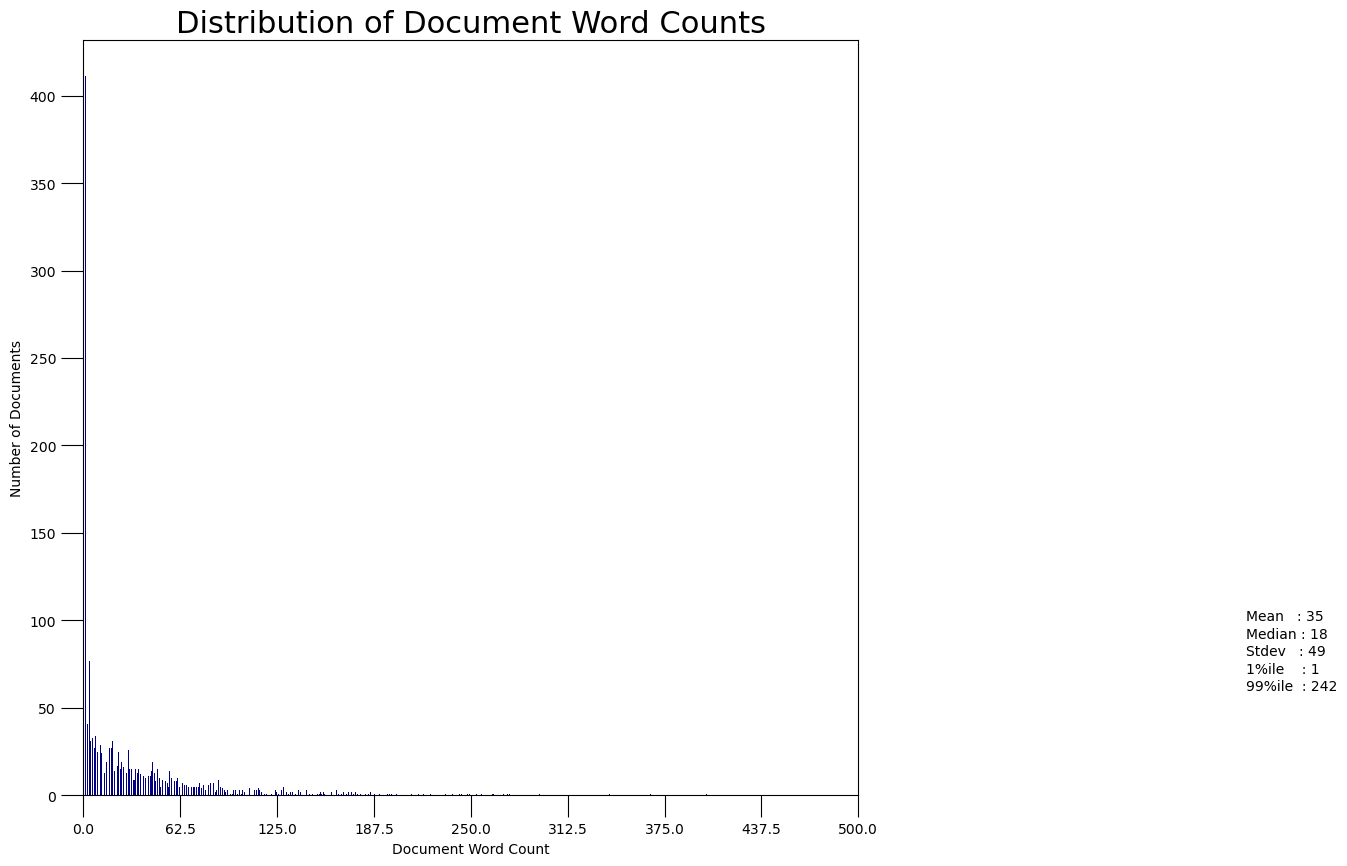

In [21]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(10,10), dpi=100)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,500,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

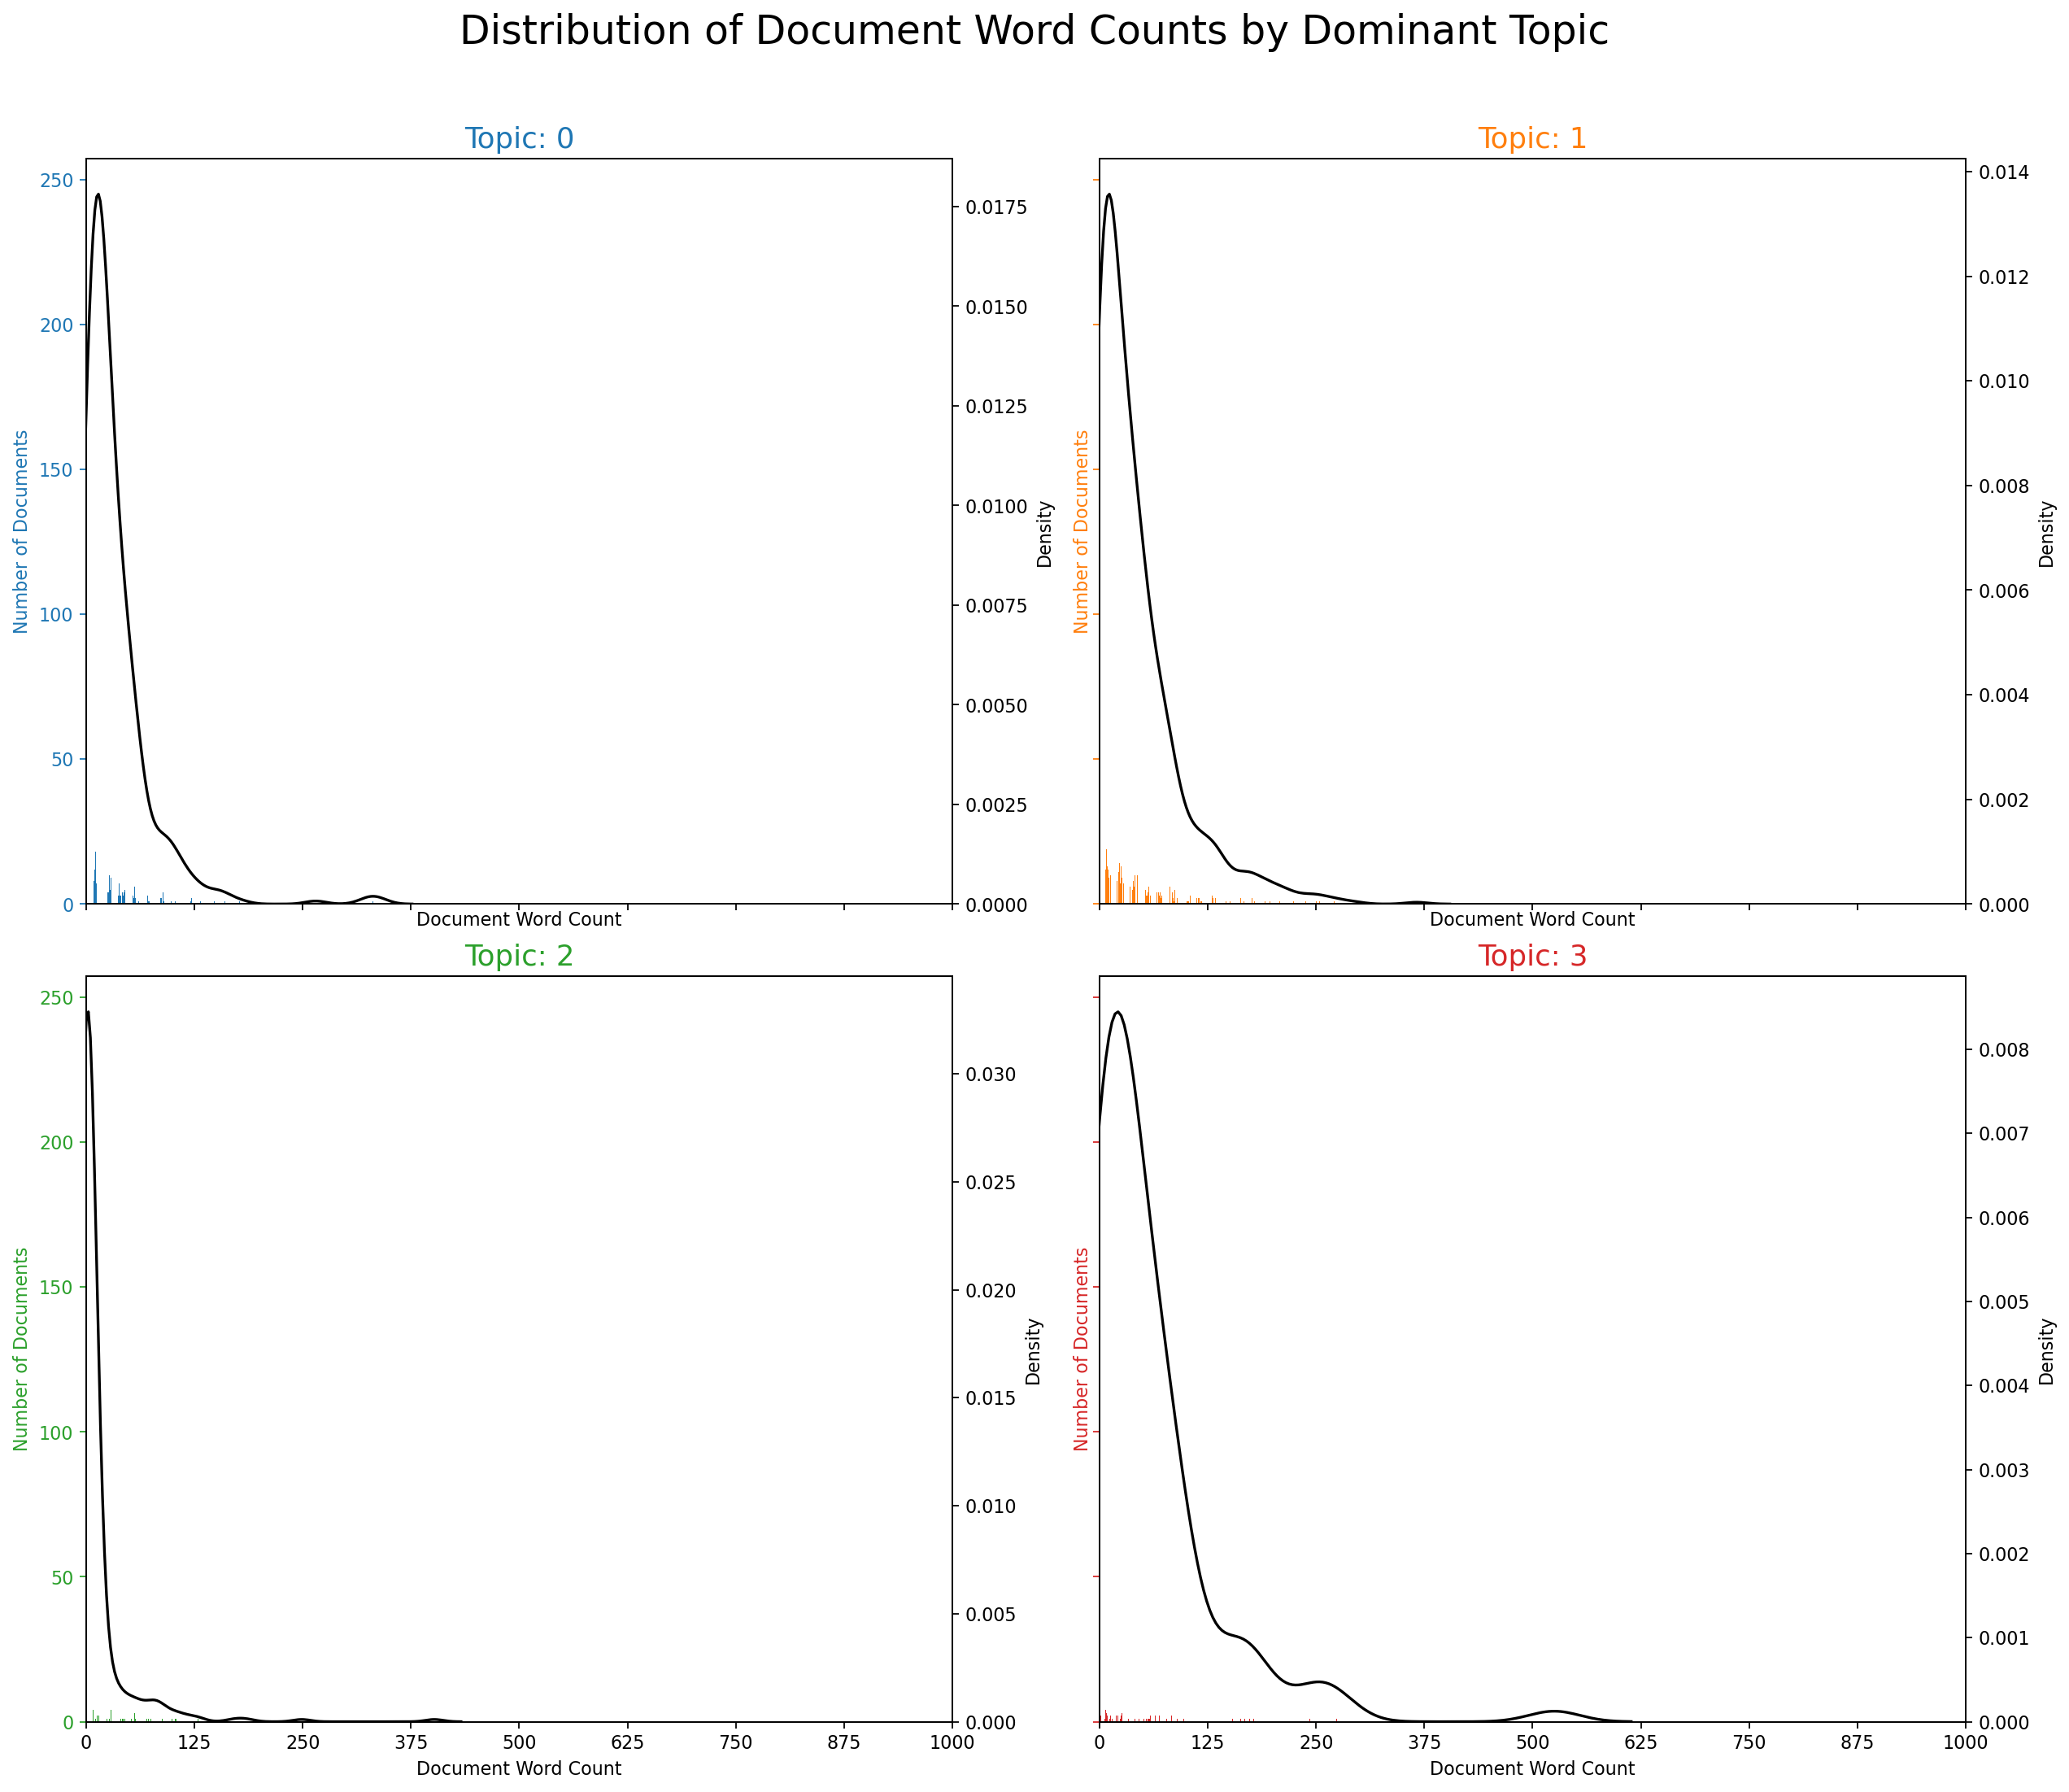

In [22]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Word Clouds of Top N Keywords in Each Topic

In [23]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more

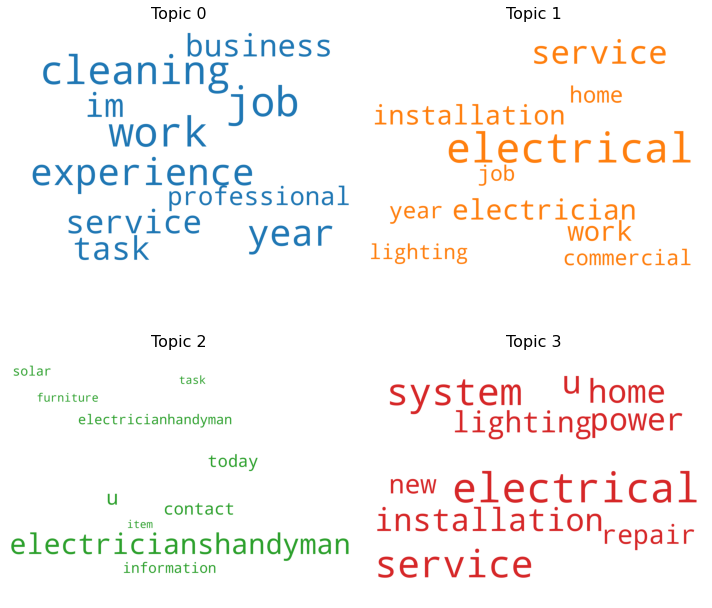

In [24]:
cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# word counts for topic keywords

<ipython-input-25-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-25-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-25-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-25-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


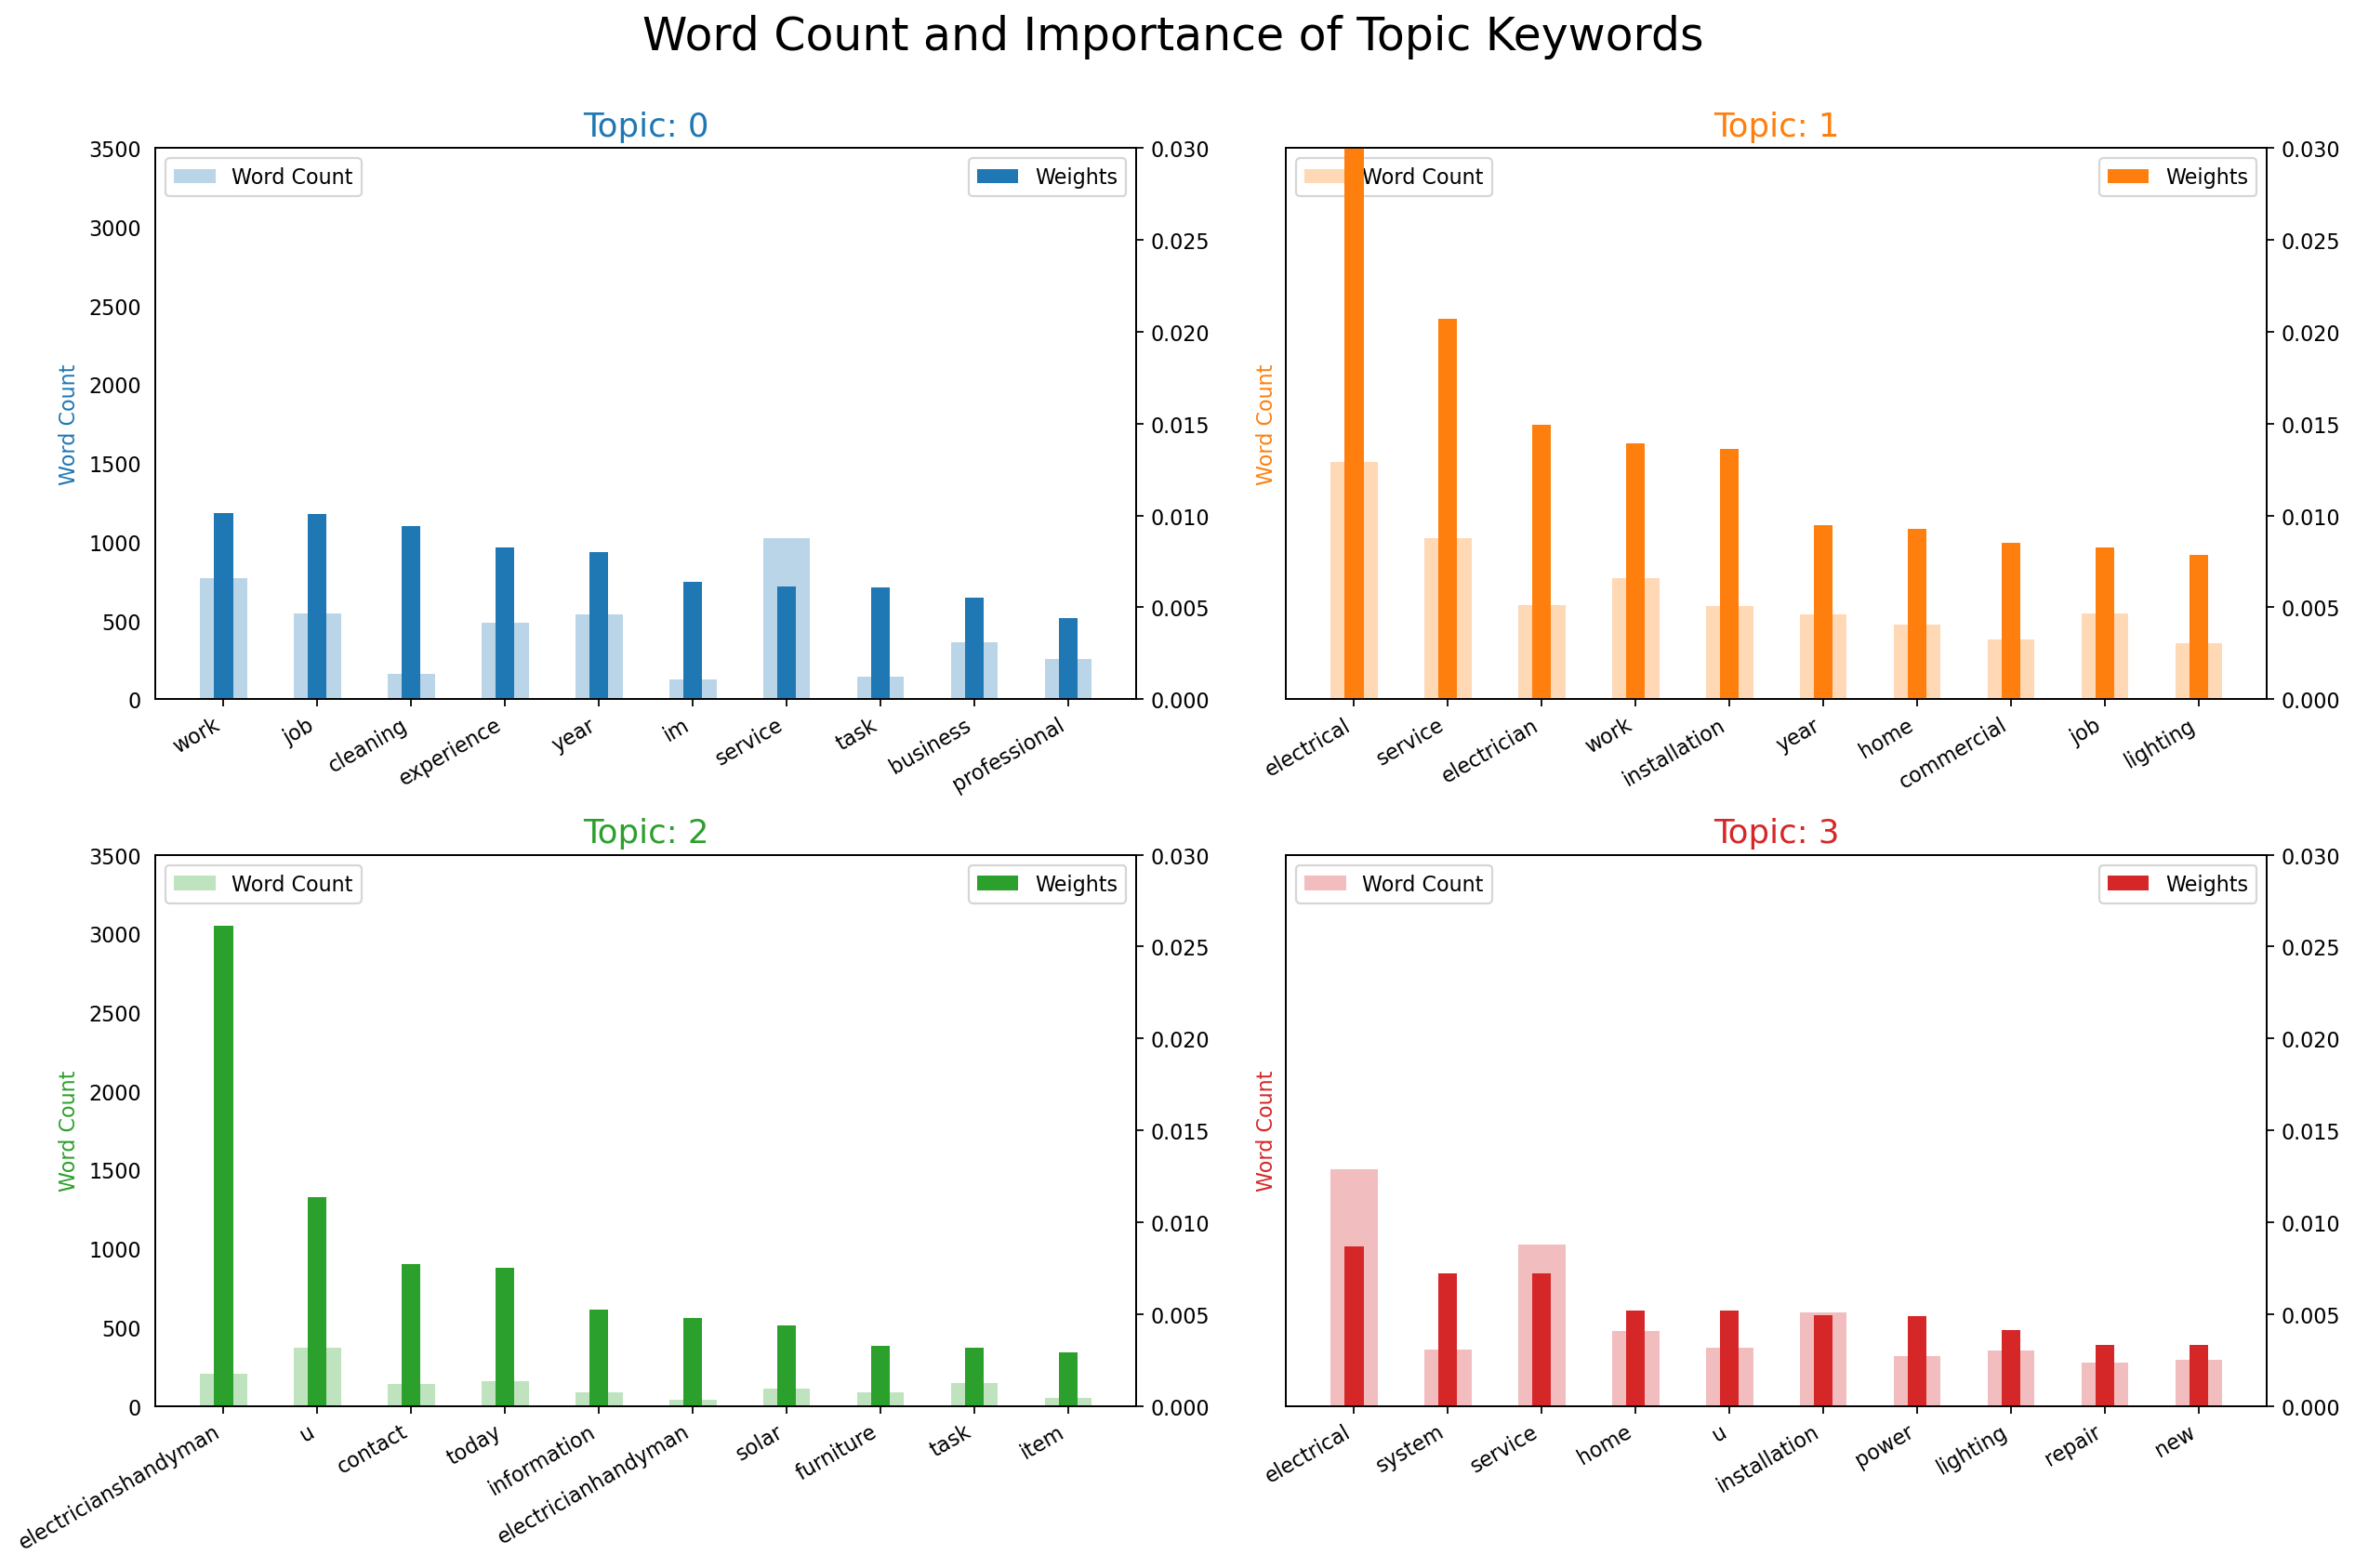

In [25]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

# t-SNE Clustering Chart

In [37]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(ldamodel[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

TypeError: cannot unpack non-iterable int object

# pyLDAVis

In [26]:
import pyLDAvis.gensim_models


In [27]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
vis

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.165340 -0.013918       1        1  57.828578
0     -0.043339 -0.135996       2        1  22.816639
3      0.022216  0.108316       3        1  11.796594
2     -0.144216  0.041598       4        1   7.558189, topic_info=                      Term         Freq        Total Category  logprob  \
17              electrical  1375.000000  1375.000000  Default  30.0000   
375   electricianshandyman   125.000000   125.000000  Default  29.0000   
62                       u   302.000000   302.000000  Default  28.0000   
376            electrician   554.000000   554.000000  Default  27.0000   
6278              cleaning   136.000000   136.000000  Default  26.0000   
...                    ...          ...          ...      ...      ...   
249                   care     7.498664    66.466589   Topic4  -6.4592   
143                quality     9.035719   291.849856   Topic4  -6.2727   
183                   year     9.629019   479.264018   Topic4  -6.2091   
42            professional     8.341666   220.410565   Topic4  -6.3526   
31                     job     8.953963   477.781761   Topic4  -6.2818   

      loglift  
17    30.0000  
375   29.0000  
62    28.0000  
376   27.0000  
6278  26.0000  
...       ...  
249    0.4006  
143   -0.8925  
183   -1.3249  
42    -0.6917  
31    -1.3945  

[319 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
935        1  0.969590    24
935        3  0.030300    24
190        1  0.290913     5
190        2  0.654554     5
190        3  0.018182     5
...      ...       ...   ...
183        3  0.016692  year
183        4  0.020865  year
11094      2  0.899637   ôå∂
2199       1  0.954530   ‚ä¢
2199       2  0.043388   ‚ä¢

[538 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

In [28]:
electric_data

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       About UsProfessional, Reliable & TrustworthyWe...
1       About UsWe have been offering complete residen...
2       We are a local owned business , and serve the ...
3       Welcome to Gold's Electrical ServicesFor servi...
4                                   Electricians/handyman
                              ...                        
1821    Installation and maintenance of electric vehic...
1822    We have been in this feild for over 8 years an...
1823    DOMESTIC, COMMERCIAL AND INDUSTRIAL\nSwitch bo...
1824    Energy-Tech Electrical Solutions currently ser...
1825    Please don't hesitate to contact Tested Electr...
Name: DESCRIPTION, Length: 1826, dtype: object

In [29]:
def predict(new_text):
  if new_text is not None and str(new_text).strip() != '':
    cleaned_data = clean(new_text).split()
    bow_vector = dictionary.doc2bow(cleaned_data)
    filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
    for index, score in sorted(ldamodel[bow_vector], key=lambda tup: -1*tup[1]):
      res = preprocess_string(ldamodel.print_topic(index, 5), filters)
      return res
  else:
    return None

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
for d in electric_data:
  print(predict(d))

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['electrical', 'system', 'service', 'home', 'u']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'system', 'service', 'home', 'u']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'install

['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'system', 'service', 'home', 'u']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'instal

['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'system', 'service', 'home', 'u']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'system', 'service', 'home', 'u']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 'u', 'contact', 'today', 'inform

['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 

['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'system', 'service', 'home', 'u']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 

['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'system', 'service', 'home', 'u']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
[

['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'system', 'service', 'home', 'u']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'system', 'service', 'home', 'u']
['electrical', 'system', 'service', 'home', 'u']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['electricianshandyman'

['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'system', 'service', 'home', 'u']
['electrical', 'system', 'service', 'home', 'u']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', '

['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['electricianshandyman', 'u', 'contact', 'today', 'information']
['work', 'job', 'cleaning', 'experience', 'year']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'system', 'service', 'home', 'u']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'system', 'service', 'home', 'u']
['work', 'job', 'cleaning', 'experience', 'year']
['elect

['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'system', 'service', 'home', 'u']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['work', 'job', 'cleaning', 'experience', 'year']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['electrical', 'service', 'electrician', 'work', 'installation']
['elec

In [31]:
coherence_model_lda = CoherenceModel(model=ldamodel, 
                                     texts=doc_clean, 
                                     dictionary=dictionary, 
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print('\nLDA Coherence Score: ', coherence_lda)

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



LDA Coherence Score:  0.5067202614557895


In [44]:
coherence_model_lda

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
coherence_model_multicore = CoherenceModel(model=lda_model_multi, 
                                     texts=doc_clean, 
                                     dictionary=dictionary, 
                                     coherence="c_v")
coherence_multicore = coherence_model_multicore.get_coherence()
print('\nMulticore Coherence Score: ', coherence_multicore)

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'lda_model_multi' is not defined